In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib .pyplot as plt

#Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#train_test_split
from sklearn.model_selection import train_test_split
#
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from collections import Counter
from numpy import where
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
#
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from numpy import mean
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.metrics import f1_score

import warnings 
warnings.filterwarnings(action= 'ignore')




In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('Test.csv')

In [3]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train_df.shape

(54808, 14)

In [6]:
test_df.shape

(23490, 13)

<AxesSubplot:>

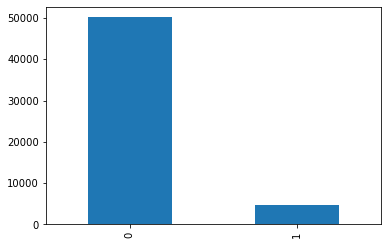

In [7]:
train_df['is_promoted'].value_counts().plot(kind='bar')

In [8]:
combine=pd.concat([train_df,test_df],sort=False)

In [9]:
combine

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [10]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


***department***

<AxesSubplot:>

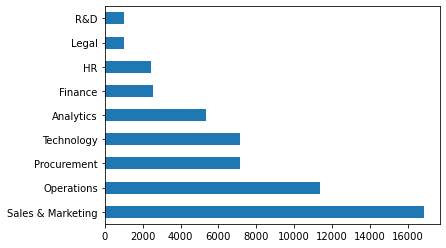

In [11]:
train_df['department'].value_counts().plot(kind='barh')

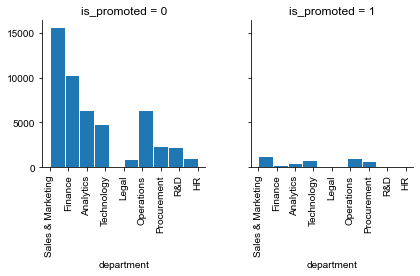

In [12]:
g=sns.FacetGrid(train_df, col="is_promoted")
sns.set(style="ticks")
g.map(plt.hist, "department")
g.set_xticklabels(rotation=90)

In [13]:
train_df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

# Missing Values

In [14]:
train_df.info()
print("\n"*3)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB




<class 'p

Education

<AxesSubplot:>

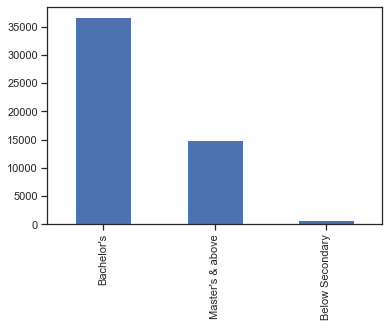

In [15]:
train_df['education'].value_counts().plot(kind='bar')

In [16]:
train_df[train_df['education'] != "Master's & above"] [train_df['education'] != "Bachelor's"] [train_df['education'] != "Below Secondary"]
train_df[train_df['education'] != "Master's & above"]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


<AxesSubplot:>

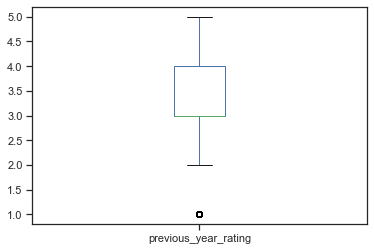

In [17]:
train_df['previous_year_rating'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

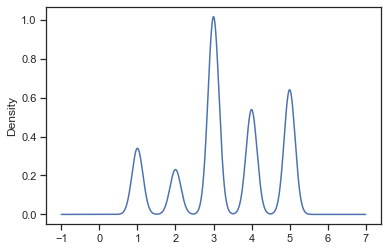

In [18]:
train_df['previous_year_rating'].plot(kind='density')

In [19]:
train_df['previous_year_rating'].describe()

count    50684.000000
mean         3.329256
std          1.259993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [20]:
#percentage of Missing Values in train_df
print("Missing Values in Train Data")
print("Nan % in previous_year_rating:", 100-train_df['previous_year_rating'].value_counts().sum()/len(train_df['previous_year_rating'])*100,"%")
print("Nan % in education:", 100-train_df['education'].value_counts().sum()/len(train_df['education'])*100,"%")

Missing Values in Train Data
Nan % in previous_year_rating: 7.524448985549554 %
Nan % in education: 4.395343745438623 %


In [21]:
#percentage of Missing Values intest_df
print("Missing Values in Test Data")
print("Nan % in previous_year_rating:", 100-test_df['previous_year_rating'].value_counts().sum()/len(test_df['previous_year_rating'])*100,"%")
print("Nan % in education:", 100-test_df['education'].value_counts().sum()/len(test_df['education'])*100,"%")

Missing Values in Test Data
Nan % in previous_year_rating: 7.713920817369086 %
Nan % in education: 4.401873137505319 %


In [22]:
#percentage of Missing Values in combine
print("Missing Values in Combine")
print("Nan % in previous_year_rating:", 100-combine['previous_year_rating'].value_counts().sum()/len(combine['previous_year_rating'])*100,"%")
print("Nan % in education:", 100-combine['education'].value_counts().sum()/len(combine['education'])*100,"%")

Missing Values in Combine
Nan % in previous_year_rating: 7.581291987023931 %
Nan % in education: 4.397302613093572 %


In [23]:
combine['previous_year_rating'].describe()

count    72362.000000
mean         3.332219
std          1.260982
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [24]:
freq=train_df['previous_year_rating'].mode()
freq

0    3.0
dtype: float64

In [25]:
train_df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [26]:
#imputing using mode for 'previous_year_rating'
train_df['previous_year_rating']=train_df['previous_year_rating'].fillna(3.0)
test_df['previous_year_rating']=test_df['previous_year_rating'].fillna(3.0)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [28]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [29]:
train_df['education'].describe()

count          52399
unique             3
top       Bachelor's
freq           36669
Name: education, dtype: object

In [30]:
#imputing using mode for 'education'
train_df['education']=train_df['education'].fillna("Bachelor's")
test_df['education']=test_df['education'].fillna("Bachelor's")

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [33]:
test_df['education'].value_counts()

Bachelor's          16612
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

# Data Visualisation

In [34]:
combine['department'].value_counts().nlargest(4)

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Name: department, dtype: int64

<Figure size 1440x720 with 0 Axes>

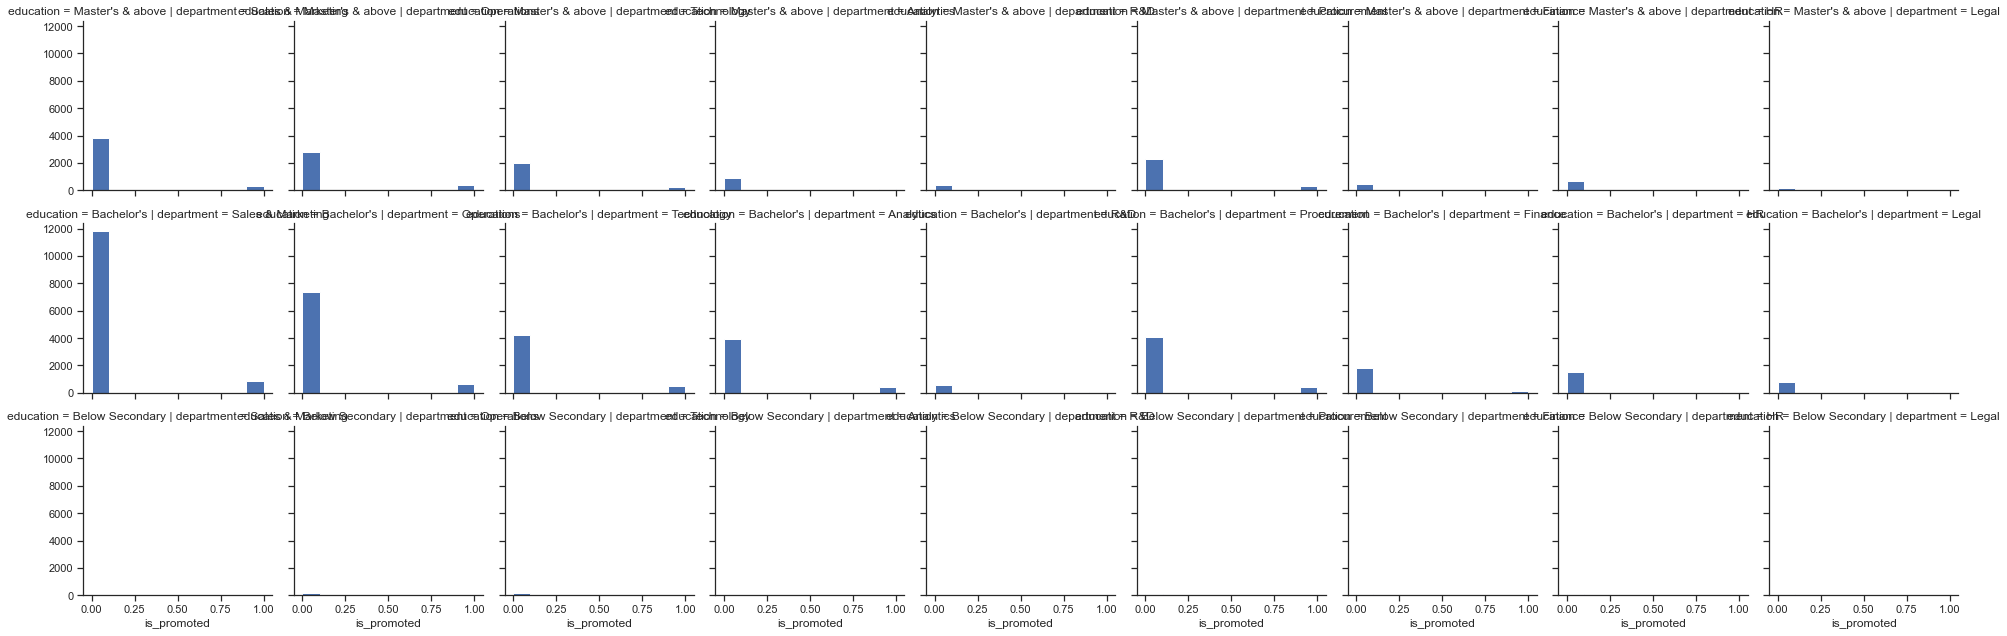

In [35]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(train_df, col="department", row="education")
g =  g.map(plt.hist,'is_promoted')

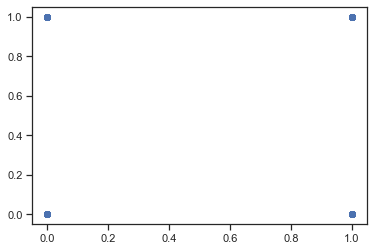

In [36]:
plt.scatter(train_df['KPIs_met >80%'],train_df['is_promoted'])

In [37]:
train_df.corr(method='pearson')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


<AxesSubplot:>

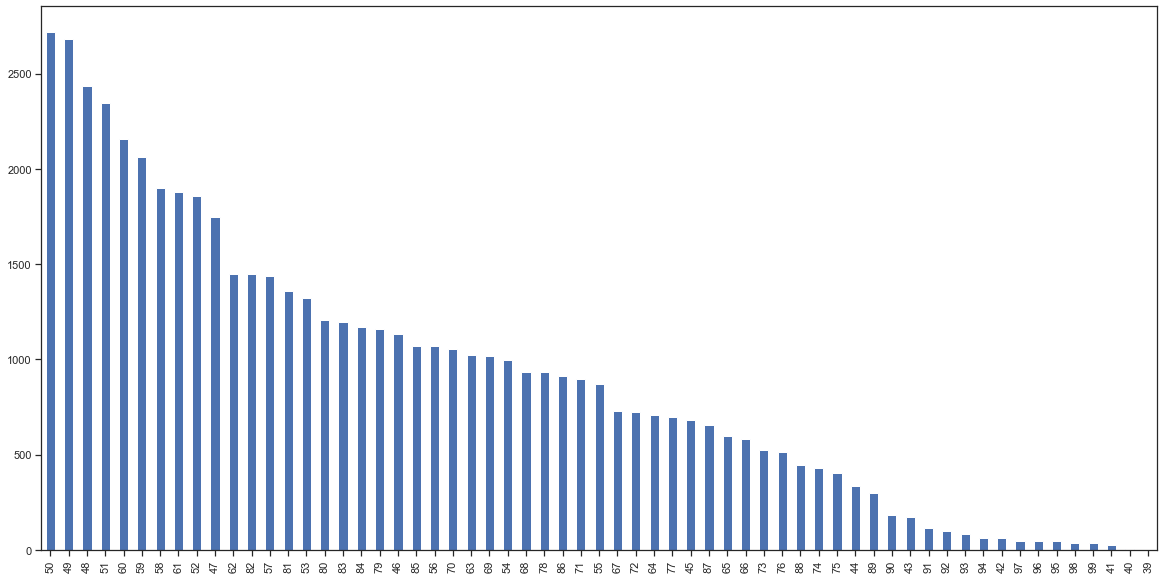

In [38]:
plt.figure(figsize=(20,10))
train_df['avg_training_score'].value_counts().plot(kind='bar')

In [39]:
train_df['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [40]:
train_df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


In [41]:
train_df[['KPIs_met >80%','awards_won?','avg_training_score','previous_year_rating','is_promoted']].corr()

,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating,is_promoted
KPIs_met >80%,1.000000,0.097000,0.078391,0.337367,0.221582
awards_won?,0.097000,1.000000,0.072138,0.026587,0.195871
avg_training_score,0.078391,0.072138,1.000000,0.071926,0.181147
previous_year_rating,0.337367,0.026587,0.071926,1.000000,0.153230
is_promoted,0.221582,0.195871,0.181147,0.153230,1.000000


In [42]:
train_df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

<AxesSubplot:>

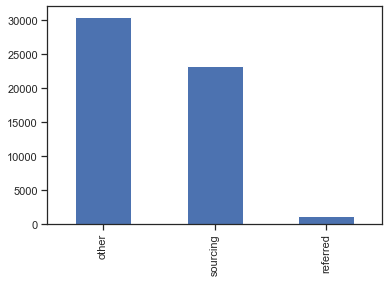

In [43]:
train_df['recruitment_channel'].value_counts().plot(kind='bar')

In [44]:
train_df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [45]:
options = [1]   
# selecting rows based on condition 
train_df.loc[(train_df['department'] == 'R&D') & 
              train_df['is_promoted'].isin(options)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
344,70197,R&D,region_22,Master's & above,m,other,1,30,4.0,2,1,0,96,1
536,6731,R&D,region_29,Bachelor's,m,sourcing,1,30,5.0,1,0,0,96,1
560,21230,R&D,region_7,Bachelor's,m,sourcing,2,32,5.0,3,1,0,83,1
1128,73853,R&D,region_4,Master's & above,m,other,1,42,4.0,8,1,0,85,1
1354,34392,R&D,region_26,Bachelor's,m,sourcing,2,40,3.0,2,1,1,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,41480,R&D,region_22,Bachelor's,m,other,2,26,4.0,2,1,0,87,1
53721,35646,R&D,region_4,Master's & above,m,sourcing,1,34,3.0,4,0,1,85,1
53731,75316,R&D,region_25,Bachelor's,m,sourcing,1,31,5.0,5,1,0,82,1
54327,23777,R&D,region_22,Bachelor's,m,other,2,30,4.0,4,1,0,84,1


# Feature Engineering

In [46]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

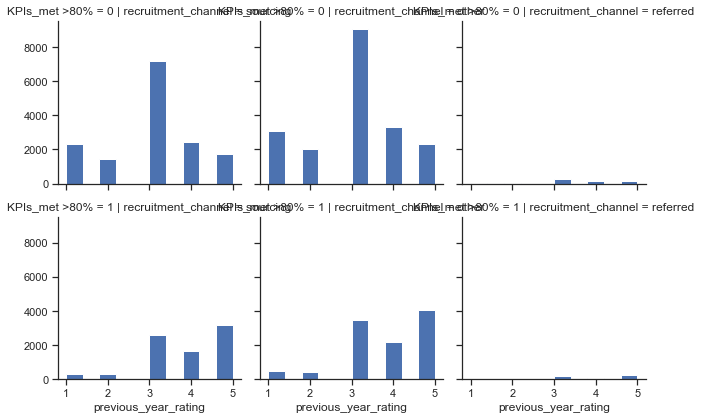

In [47]:
g = sns.FacetGrid(train_df, row='KPIs_met >80%',col='recruitment_channel')
g = g.map(plt.hist,'previous_year_rating')

Feature Importance

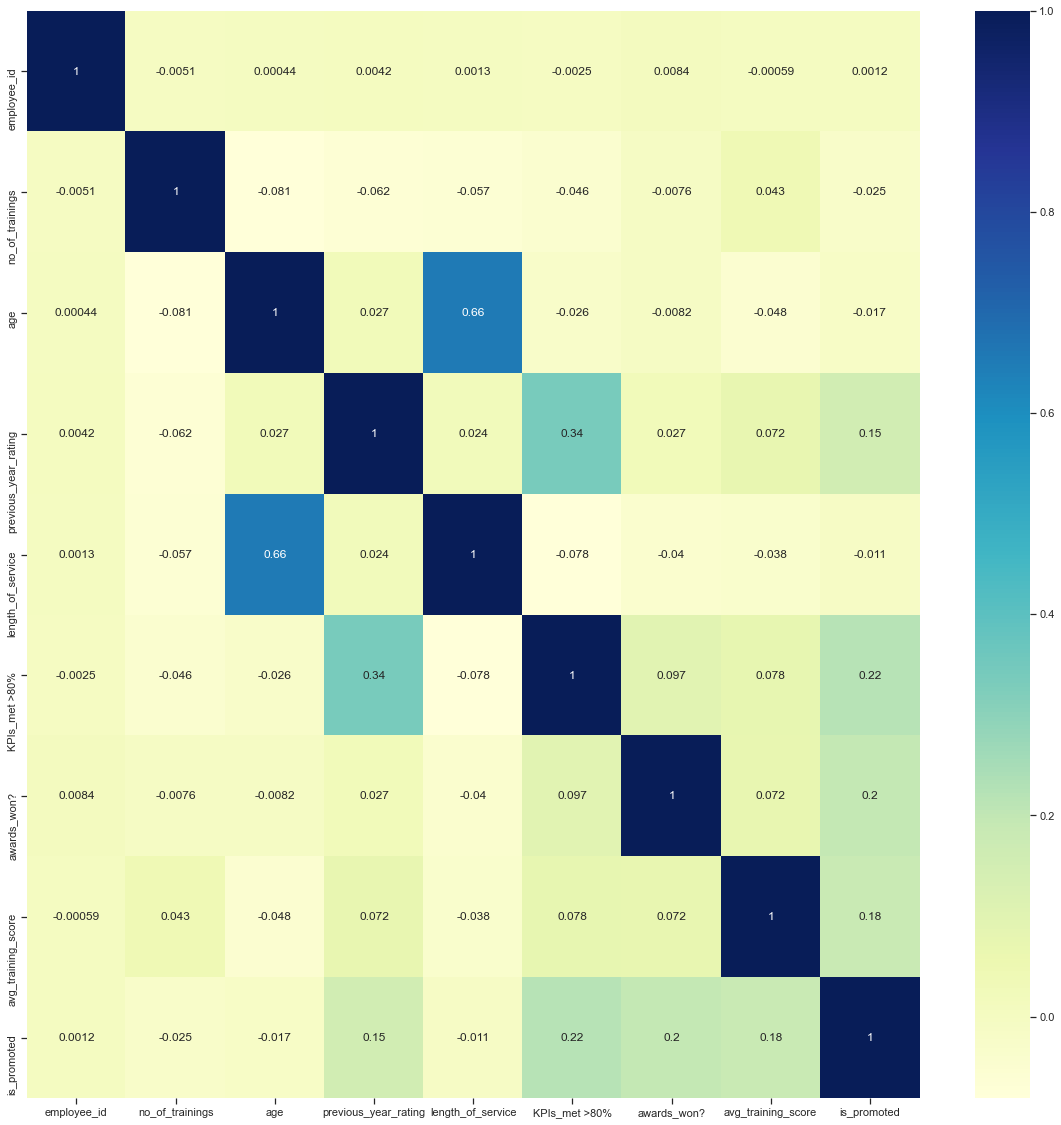

In [48]:
#get correlations of each features in dataset
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [49]:
train_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


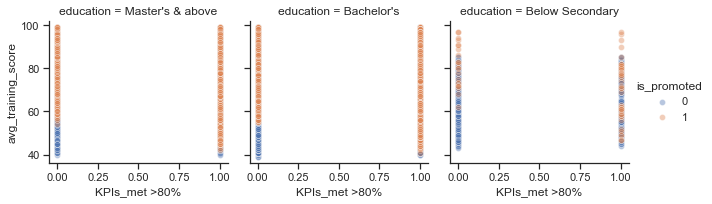

In [50]:
g = sns.FacetGrid(train_df, col="education",hue='is_promoted')
g.map(sns.scatterplot,'KPIs_met >80%','avg_training_score',alpha=.4)
g.add_legend()

<AxesSubplot:>

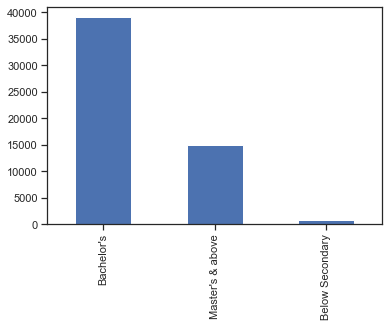

In [51]:
train_df['education'].value_counts().plot(kind='bar')

In [52]:
options = [0]   
# selecting rows based on condition 
train_df.loc[(train_df['department'] == 'legal') & 
              train_df['is_promoted'].isin(options)] 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


# Data Encoding

In [53]:
for i in train_df:
   print  (pd.DataFrame(train_df['{}'.format(i)].value_counts()))

       employee_id
2047             1
19228            1
4887             1
6934             1
789              1
...            ...
71176            1
44543            1
48637            1
36347            1
4098             1

[54808 rows x 1 columns]
                   department
Sales & Marketing       16840
Operations              11348
Procurement              7138
Technology               7138
Analytics                5352
Finance                  2536
HR                       2418
Legal                    1039
R&D                       999
           region
region_2    12343
region_22    6428
region_7     4843
region_15    2808
region_13    2648
region_26    2260
region_31    1935
region_4     1703
region_27    1659
region_16    1465
region_28    1318
region_11    1315
region_23    1175
region_29     994
region_32     945
region_19     874
region_20     850
region_14     827
region_25     819
region_17     796
region_5      766
region_6      690
region_30     657
region_8      

In [54]:
Filter_train=train_df.drop(columns=['employee_id','region','age','gender','recruitment_channel'],axis=1)
#Filter_train['gender']=Filter_train['gender'].replace({'f':0,'m':1})
#Filter_train['education']=Filter_train['education'].replace({"Below Secondary":0,"Bachelor's":1,"Master's & above":2})



In [55]:
dummies_dept=pd.get_dummies(Filter_train.department)
dummies_edu=pd.get_dummies(Filter_train.education)


In [56]:
merged=pd.concat([Filter_train,dummies_dept,dummies_edu], axis='columns')
merged

,department,education,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Analytics,...,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,Below Secondary,Master's & above
0,Sales & Marketing,Master's & above,1,5.0,8,1,0,49,0,0,...,0,0,0,0,0,1,0,0,0,1
1,Operations,Bachelor's,1,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,0,1,0,0
2,Sales & Marketing,Bachelor's,1,3.0,7,0,0,50,0,0,...,0,0,0,0,0,1,0,1,0,0
3,Sales & Marketing,Bachelor's,2,1.0,10,0,0,50,0,0,...,0,0,0,0,0,1,0,1,0,0
4,Technology,Bachelor's,1,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,Bachelor's,1,3.0,17,0,0,78,0,0,...,0,0,0,0,0,0,1,1,0,0
54804,Operations,Master's & above,1,2.0,6,0,0,56,0,0,...,0,0,1,0,0,0,0,0,0,1
54805,Analytics,Bachelor's,1,5.0,3,1,0,79,0,1,...,0,0,0,0,0,0,0,1,0,0
54806,Sales & Marketing,Bachelor's,1,1.0,2,0,0,45,0,0,...,0,0,0,0,0,1,0,1,0,0


In [57]:
#Rule of thumb
Preprocessed = merged.drop(['Technology','department','education','Below Secondary'], axis='columns')


In [58]:
Preprocessed

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Bachelor's,Master's & above
0,1,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,1
1,1,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,1,0
2,1,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,1,0
3,2,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,1,0
4,1,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,3.0,17,0,0,78,0,0,0,0,0,0,0,0,0,1,0
54804,1,2.0,6,0,0,56,0,0,0,0,0,1,0,0,0,0,1
54805,1,5.0,3,1,0,79,0,1,0,0,0,0,0,0,0,1,0
54806,1,1.0,2,0,0,45,0,0,0,0,0,0,0,0,1,1,0


In [59]:
X=Preprocessed.drop(['is_promoted'],axis='columns')
y=Preprocessed.is_promoted

# TEST DATA ENCODING

In [60]:
Filter_test=test_df.drop(columns=['employee_id','region','age','gender','recruitment_channel'],axis=1)
#Filter_test['gender']=Filter_test['gender'].replace({'f':0,'m':1})
#Filter_test['education']=Filter_test['education'].replace({"Below Secondary":0,"Bachelor's":1,"Master's & above":2})

In [61]:
dummies_dept_test=pd.get_dummies(Filter_test.department)
dummies_edu_test=pd.get_dummies(Filter_test.education)

In [62]:
#dummies_channel_test=pd.get_dummies(Filter_test.recruitment_channel)
merged_test=pd.concat([Filter_test,dummies_dept_test,dummies_edu_test], axis='columns')

In [63]:
#Rule of thumb
Final_Test = merged_test.drop(['Technology','department','education','Below Secondary'], axis='columns')
Final_Test

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Bachelor's,Master's & above
0,1,3.0,1,1,0,77,0,0,0,0,0,0,0,0,1,0
1,1,3.0,5,0,0,51,0,0,1,0,0,0,0,0,1,0
2,1,1.0,4,0,0,47,0,0,0,0,0,0,0,1,1,0
3,3,2.0,9,0,0,65,0,0,0,0,0,1,0,0,1,0
4,1,4.0,7,0,0,61,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,3.0,1,0,0,61,0,0,0,1,0,0,0,0,0,0
23486,1,3.0,7,0,0,74,0,0,0,0,0,0,0,0,1,0
23487,1,4.0,4,0,0,50,0,0,1,0,0,0,0,0,1,0
23488,3,3.0,1,0,0,70,0,0,0,0,0,1,0,0,1,0


# Univariate Selection

In [64]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [65]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [66]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [67]:
featureScores

,Specs,Score
0,no_of_trainings,10.063491
1,previous_year_rating,574.656810
2,length_of_service,19.351084
3,KPIs_met >80%,1743.827117
4,awards_won?,2054.009313
5,avg_training_score,5072.973743
6,Analytics,7.565959
7,Finance,0.505199
8,HR,25.964640
9,Legal,15.560025


<AxesSubplot:>

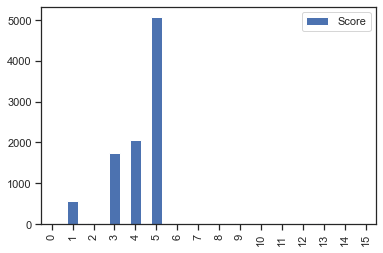

In [68]:
featureScores.plot(kind='bar')

# Feature Importance

In [69]:
model = ExtraTreesClassifier()

In [70]:
model.fit(X,y)

ExtraTreesClassifier()

In [71]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03026648 0.0625799  0.18151089 0.06881683 0.05083536 0.48527251
 0.01370853 0.00897848 0.00403478 0.00309029 0.02681839 0.02098981
 0.00853008 0.02817547 0.003211   0.0031812 ]


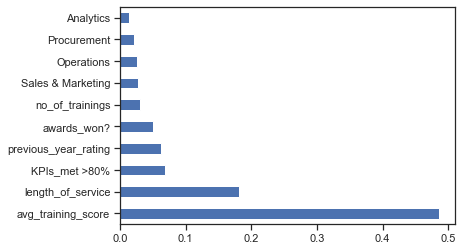

In [72]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [73]:
X

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Bachelor's,Master's & above
0,1,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,1
1,1,5.0,4,0,0,60,0,0,0,0,1,0,0,0,1,0
2,1,3.0,7,0,0,50,0,0,0,0,0,0,0,1,1,0
3,2,1.0,10,0,0,50,0,0,0,0,0,0,0,1,1,0
4,1,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,3.0,17,0,0,78,0,0,0,0,0,0,0,0,1,0
54804,1,2.0,6,0,0,56,0,0,0,0,1,0,0,0,0,1
54805,1,5.0,3,1,0,79,1,0,0,0,0,0,0,0,1,0
54806,1,1.0,2,0,0,45,0,0,0,0,0,0,0,1,1,0


In [74]:
#Selected Features
X.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'Analytics',
       'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 'R&D',
       'Sales & Marketing', 'Bachelor's', 'Master's & above'],
      dtype='object')

# Normalising and Standardizing Data

In [75]:
#Normalized Data
normalized_X = preprocessing.normalize(X)
normalized_X

array([[0.02002404, 0.10012022, 0.16019235, ..., 0.02002404, 0.        ,
        0.02002404],
       [0.01656574, 0.0828287 , 0.06626296, ..., 0.        , 0.01656574,
        0.        ],
       [0.01976038, 0.05928113, 0.13832263, ..., 0.01976038, 0.01976038,
        0.        ],
       ...,
       [0.01261987, 0.06309933, 0.0378596 , ..., 0.        , 0.01261987,
        0.        ],
       [0.02217846, 0.02217846, 0.04435691, ..., 0.02217846, 0.02217846,
        0.        ],
       [0.02028602, 0.02028602, 0.1014301 , ..., 0.        , 0.02028602,
        0.        ]])

In [76]:
#Standardized Data
standardised_X = preprocessing.scale(X)
standardised_X

array([[-0.41527615,  1.39576589,  0.50045956, ...,  1.50154315,
        -1.57616545,  1.63469502],
       [-0.41527615,  1.39576589, -0.43739464, ..., -0.66598153,
         0.63445116, -0.6117349 ],
       [-0.41527615, -0.25065148,  0.26599601, ...,  1.50154315,
         0.63445116, -0.6117349 ],
       ...,
       [-0.41527615,  1.39576589, -0.67185819, ..., -0.66598153,
         0.63445116, -0.6117349 ],
       [-0.41527615, -1.89706886, -0.90632174, ...,  1.50154315,
         0.63445116, -0.6117349 ],
       [-0.41527615, -1.89706886, -0.20293109, ..., -0.66598153,
         0.63445116, -0.6117349 ]])

In [77]:
standardised_X.max()

14.356779712812056

In [78]:
normalized_X.max()

0.9997769931211817

# Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test=train_test_split(standardised_X,y,test_size=0.3, random_state=0)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38365, 16)
(16443, 16)
(38365,)
(16443,)


# SMOTE FOR IMBALANCE DATASET

In [82]:
unique, count = np.unique(y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 35083, 1: 3282}

In [83]:
sm = SMOTE(random_state=12, sampling_strategy= 0.5)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [84]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 35083, 1: 17541}

# K-fold

In [86]:
weights = np.arange(1,11,1)
param_grid = {'scale_pos_weight':weights}

In [87]:
param_grid

{'scale_pos_weight': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}

In [82]:
Model=XGBClassifier()

In [142]:
SKF = KFold(n_splits=10, shuffle=True, random_state=1)

In [172]:
grid = GridSearchCV(estimator=Model, param_grid=param_grid, n_jobs=-1, cv=SKF, scoring='f1')

In [173]:
grid_result = grid.fit(X, y)

In [174]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.511546 using {'scale_pos_weight': 2}


In [175]:
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



0.505903 (0.016081) with: {'scale_pos_weight': 1}
0.511546 (0.012808) with: {'scale_pos_weight': 2}
0.507027 (0.013993) with: {'scale_pos_weight': 3}
0.484117 (0.011115) with: {'scale_pos_weight': 4}
0.457657 (0.007884) with: {'scale_pos_weight': 5}
0.438242 (0.007750) with: {'scale_pos_weight': 6}
0.417414 (0.005170) with: {'scale_pos_weight': 7}
0.406986 (0.005675) with: {'scale_pos_weight': 8}
0.399352 (0.009272) with: {'scale_pos_weight': 9}
0.396174 (0.007888) with: {'scale_pos_weight': 10}


In [153]:
print("Cross-validation scores:\n{}".format(cross_val_score(Model,X,y, cv=SKF,scoring='f1').mean()))

Cross-validation scores:
0.43989101385443713


In [141]:
def best_model(x,y):
    model=[LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,XGBClassifier]
    skf = StratifiedKFold()
    for i in model:
        print(i,"\n","Cross-validation scores:\n{}".format(cross_val_score(i(), x,y, cv=skf,scoring='f1').mean()))


In [142]:
best_model(normalized_X,y)

/Users/yugeshnaidu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/yugeshnaidu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yugeshnaidu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yugeshnaidu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yugeshnaidu/opt/anaco

<class 'sklearn.linear_model.logistic.LogisticRegression'> 
 Cross-validation scores:
0.0
<class 'sklearn.tree.tree.DecisionTreeClassifier'> 
 Cross-validation scores:
0.4454049871768983


/Users/yugeshnaidu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yugeshnaidu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yugeshnaidu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<class 'sklearn.ensemble.forest.RandomForestClassifier'> 
 Cross-validation scores:
0.4587366512388351
<class 'sklearn.neighbors.classification.KNeighborsClassifier'> 
 Cross-validation scores:
0.23228611634414822
<class 'xgboost.sklearn.XGBClassifier'> 
 Cross-validation scores:
0.4248534908735728


# HYPERPARAMETER TUNING

**USING OPTUNA**

In [178]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [87]:
import optuna

In [145]:
param_grid={'min_child_weight' : np.arange(0,2,0.2),
           'gamma': np.arange(0,2,0.2),
           'learning_rate': (0,2,0.2)}

In [144]:
np.arange(0,2,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

In [97]:
def objective(trial):
    booster = trial.suggest_categorical('booster', ['gbtree','dart','gblinear'])
    tree_method = trial.suggest_categorical('tree_method', ['exact', 'hist'])
    eta = trial.suggest_loguniform('eta', 1e-5,1)
    gamma = trial.suggest_loguniform('gamma', 1e-5,10)
    max_depth = trial.suggest_int('max_depth', 1,10)
    min_child_weight = trial.suggest_loguniform('min_child_weight', 1e-5,10)
    max_delta_step = trial.suggest_loguniform('max_delta_step', 1e-5,1)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-5,1)
    scale_pos_weight = trial.suggest_loguniform('scale_pos_weight', 1e-5,1)
    
    xgboost_tuna = XGBClassifier(
        random_state=42, 
        booster=booster,
        tree_method=tree_method,
        gamma=gamma,
        max_depth = max_depth,
        min_child_weight = min_child_weight,
        eta = eta,
        max_delta_step=max_delta_step,
        reg_lambda=reg_lambda,
        scale_pos_weight = scale_pos_weight,
    )
    
    xgboost_tuna.fit(X_train, y_train)
    tuna_pred_test = xgboost_tuna.predict(X_test)
    
    return (f1_score(y_test, tuna_pred_test))
                                              
                                                                                


In [98]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2020-10-23 23:15:09,454] A new study created in memory with name: no-name-7a7c973d-f141-45ef-9996-477998cb2d70
[I 2020-10-23 23:15:11,196] Trial 0 finished with value: 0.10655737704918034 and parameters: {'booster': 'dart', 'tree_method': 'hist', 'eta': 0.11220785018156765, 'gamma': 0.00010777141526284825, 'max_depth': 9, 'min_child_weight': 9.700812998881176e-05, 'max_delta_step': 0.0003147263919766572, 'reg_lambda': 0.0006811932902963203, 'scale_pos_weight': 0.106717032586143}. Best is trial 0 with value: 0.10655737704918034.
[I 2020-10-23 23:15:11,987] Trial 1 finished with value: 0.0 and parameters: {'booster': 'dart', 'tree_method': 'hist', 'eta': 0.01679464483417112, 'gamma': 0.0025559367703979195, 'max_depth': 4, 'min_child_weight': 0.13327503971975926, 'max_delta_step': 5.09098460760178e-05, 'reg_lambda': 0.0265106667961423, 'scale_pos_weight': 0.002323544001697586}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:12,793] Trial 2 finished with value: 0.0 and parameters:

[23:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:15,868] Trial 6 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 0.0006920865067946598, 'gamma': 3.0129580377202242e-05, 'max_depth': 4, 'min_child_weight': 5.517087881903249, 'max_delta_step': 0.04135164302237255, 'reg_lambda': 0.0002139126818400622, 'scale_pos_weight': 0.016764692605545008}. Best is trial 1 with value: 0.0.


[23:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:16,328] Trial 7 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 0.003731451247217156, 'gamma': 0.00321283849058045, 'max_depth': 6, 'min_child_weight': 0.21172340907519177, 'max_delta_step': 0.0009888637037902554, 'reg_lambda': 1.1314564020595279e-05, 'scale_pos_weight': 0.026212128684230823}. Best is trial 1 with value: 0.0.


[23:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:16,795] Trial 8 finished with value: 0.043447792571829014 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 0.31937216484336767, 'gamma': 0.0002804983953235618, 'max_depth': 9, 'min_child_weight': 9.418590821449088, 'max_delta_step': 0.6370735007237226, 'reg_lambda': 4.067939672458689e-05, 'scale_pos_weight': 0.5696565526109268}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:17,557] Trial 9 finished with value: 0.0 and parameters: {'booster': 'dart', 'tree_method': 'hist', 'eta': 0.00017674858665627928, 'gamma': 0.5323806415382906, 'max_depth': 4, 'min_child_weight': 0.021175582491222478, 'max_delta_step': 0.0002443705827515248, 'reg_lambda': 0.0017242145350391557, 'scale_pos_weight': 0.0028470297965362927}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:18,385] Trial 10 finished with value: 0.0 and parameters: {'booster': 'dart', 'tree_method': 'hist', 'eta': 1.486292465213481e-05, 'gamma': 6.029682926947969, 'max_depth': 1, 'min_ch

[I 2020-10-23 23:15:37,565] Trial 29 finished with value: 0.11042944785276072 and parameters: {'booster': 'gbtree', 'tree_method': 'exact', 'eta': 0.052706115842149605, 'gamma': 0.0012822035852928216, 'max_depth': 10, 'min_child_weight': 1.5174470746490134, 'max_delta_step': 0.03253797324366774, 'reg_lambda': 0.043560669460041154, 'scale_pos_weight': 0.09785265230736492}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:39,146] Trial 30 finished with value: 0.10655737704918034 and parameters: {'booster': 'gbtree', 'tree_method': 'exact', 'eta': 0.007300231489686599, 'gamma': 3.700341735069635e-05, 'max_depth': 9, 'min_child_weight': 0.06631813846273396, 'max_delta_step': 0.07730731533542795, 'reg_lambda': 0.000697055466279656, 'scale_pos_weight': 0.08428997457347438}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:39,909] Trial 31 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'exact', 'eta': 2.2367406519082548e-05, 'gamma': 0.03629496097995627,

[23:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:44,144] Trial 38 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 0.001906985598336351, 'gamma': 0.3324448498058711, 'max_depth': 3, 'min_child_weight': 0.00023697213683985808, 'max_delta_step': 0.001573107765988244, 'reg_lambda': 0.0001373227559351952, 'scale_pos_weight': 4.1642167616739206e-05}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:44,734] Trial 39 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.0001109353712033817, 'gamma': 0.060185578406401215, 'max_depth': 7, 'min_child_weight': 3.09109049748968e-05, 'max_delta_step': 0.0005848406998376487, 'reg_lambda': 0.5542586275992704, 'scale_pos_weight': 0.0056451597813396105}. Best is trial 1 with value: 0.0.


[23:15:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:45,374] Trial 40 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 3.781332886302014e-05, 'gamma': 1.4324187248850728, 'max_depth': 5, 'min_child_weight': 0.019998123511979694, 'max_delta_step': 0.0008616272244192865, 'reg_lambda': 0.0001303651484499583, 'scale_pos_weight': 0.0001453079086210817}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:47,261] Trial 41 finished with value: 0.0 and parameters: {'booster': 'dart', 'tree_method': 'exact', 'eta': 3.9411489722566846e-05, 'gamma': 9.885898596889128, 'max_depth': 5, 'min_child_weight': 0.008850714848630007, 'max_delta_step': 0.028645717657259522, 'reg_lambda': 5.0418572965859576e-05, 'scale_pos_weight': 1.694391366647687e-05}. Best is trial 1 with value: 0.0.


[23:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:47,863] Trial 42 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 3.7888981702492586e-05, 'gamma': 1.6087322336596566, 'max_depth': 5, 'min_child_weight': 0.0028982509506822384, 'max_delta_step': 0.4225028960753298, 'reg_lambda': 3.25558822202528e-05, 'scale_pos_weight': 0.0002070897503921449}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:49,599] Trial 43 finished with value: 0.0 and parameters: {'booster': 'dart', 'tree_method': 'exact', 'eta': 1.7409081094194184e-05, 'gamma': 2.7275094053327904, 'max_depth': 1, 'min_child_weight': 0.0011552135707064432, 'max_delta_step': 0.040872805040289256, 'reg_lambda': 2.669202096820569e-05, 'scale_pos_weight': 1.5971523934632435e-05}. Best is trial 1 with value: 0.0.


[23:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:51,059] Trial 44 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 1.2265642389202225e-05, 'gamma': 2.241266629468826, 'max_depth': 4, 'min_child_weight': 0.0030125354638459874, 'max_delta_step': 0.5012242814422841, 'reg_lambda': 0.0005679136168718195, 'scale_pos_weight': 7.298956584496542e-05}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:53,875] Trial 45 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'exact', 'eta': 0.003015361988907692, 'gamma': 0.0046645877575428275, 'max_depth': 1, 'min_child_weight': 0.4920375757591888, 'max_delta_step': 0.08287163553989013, 'reg_lambda': 1.722100555636251e-05, 'scale_pos_weight': 0.003792077076553173}. Best is trial 1 with value: 0.0.


[23:15:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:54,804] Trial 46 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 1.1389371050463325e-05, 'gamma': 0.12078482560550778, 'max_depth': 4, 'min_child_weight': 4.344477533617329, 'max_delta_step': 0.19541916232588977, 'reg_lambda': 0.0034501276725188907, 'scale_pos_weight': 0.0006854872875530521}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:56,252] Trial 47 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'exact', 'eta': 0.0008385882477029257, 'gamma': 0.004689209798691294, 'max_depth': 3, 'min_child_weight': 0.6103663830163623, 'max_delta_step': 0.0059459070911644365, 'reg_lambda': 1.2166191309572305e-05, 'scale_pos_weight': 0.003475124846248742}. Best is trial 1 with value: 0.0.


[23:15:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:57,023] Trial 48 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 2.4197296422096157e-05, 'gamma': 0.020768430033510126, 'max_depth': 4, 'min_child_weight': 3.522305020209969, 'max_delta_step': 0.07928752734175006, 'reg_lambda': 0.01767946421882861, 'scale_pos_weight': 0.01620794170714421}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:15:59,091] Trial 49 finished with value: 0.11042944785276072 and parameters: {'booster': 'gbtree', 'tree_method': 'exact', 'eta': 0.0008651981753328471, 'gamma': 0.014265177847008014, 'max_depth': 3, 'min_child_weight': 2.4094882848073054, 'max_delta_step': 0.0058455447440069214, 'reg_lambda': 0.015673102709899328, 'scale_pos_weight': 0.04776275143971034}. Best is trial 1 with value: 0.0.


[23:15:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:15:59,727] Trial 50 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 0.0009201976852277481, 'gamma': 0.01879136537419807, 'max_depth': 4, 'min_child_weight': 8.74990299766748, 'max_delta_step': 0.07128218950708154, 'reg_lambda': 1.004460109218735e-05, 'scale_pos_weight': 0.01361518572402117}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:00,182] Trial 51 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.00041569498634304357, 'gamma': 0.03164581464868499, 'max_depth': 8, 'min_child_weight': 0.0001963479337539317, 'max_delta_step': 0.0029886315233070837, 'reg_lambda': 0.13626529261916337, 'scale_pos_weight': 0.0014770049906139048}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:00,626] Trial 52 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.0003145235371719587, 'gamma': 0.11882521555358697, 'max_depth': 9, 'min_child_wei

[23:16:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:08,455] Trial 64 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 0.0022009925940631595, 'gamma': 0.26934905593569636, 'max_depth': 2, 'min_child_weight': 1.7189166390747237e-05, 'max_delta_step': 0.00010349772262989265, 'reg_lambda': 0.09278483881512004, 'scale_pos_weight': 3.277613440085193e-05}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:08,956] Trial 65 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.0017222097292893754, 'gamma': 0.0014812720389788603, 'max_depth': 7, 'min_child_weight': 0.00027120949891161266, 'max_delta_step': 0.00017188577920365989, 'reg_lambda': 0.032428878498735665, 'scale_pos_weight': 3.864002401614359e-05}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:09,363] Trial 66 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.00010691324782296019, 'gamma': 0.06658403072800556, 'max_depth': 7, 

[23:16:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:10,379] Trial 68 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 8.881764759664586e-05, 'gamma': 0.9220968346632116, 'max_depth': 7, 'min_child_weight': 0.01678599590904126, 'max_delta_step': 0.0005512996275047917, 'reg_lambda': 0.00010984354435251067, 'scale_pos_weight': 0.00015866306638295764}. Best is trial 1 with value: 0.0.


[23:16:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:11,022] Trial 69 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 7.054261180950212e-05, 'gamma': 0.3480969820047122, 'max_depth': 6, 'min_child_weight': 5.3369195485191365e-05, 'max_delta_step': 0.0008903414451535686, 'reg_lambda': 0.00012995947715375376, 'scale_pos_weight': 5.494232385299122e-05}. Best is trial 1 with value: 0.0.


[23:16:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:11,953] Trial 70 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 3.047861438783685e-05, 'gamma': 0.015844081194520944, 'max_depth': 5, 'min_child_weight': 1.0287367966412748e-05, 'max_delta_step': 0.0003005418611096394, 'reg_lambda': 0.00015082863072794612, 'scale_pos_weight': 2.5199450301647916e-05}. Best is trial 1 with value: 0.0.


[23:16:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:12,599] Trial 71 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 4.1368040632305654e-05, 'gamma': 1.2544614560499538, 'max_depth': 5, 'min_child_weight': 0.016632974142747687, 'max_delta_step': 0.00020593451352040706, 'reg_lambda': 4.2005708734861274e-05, 'scale_pos_weight': 0.00017579789971634827}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:14,761] Trial 72 finished with value: 0.0 and parameters: {'booster': 'dart', 'tree_method': 'exact', 'eta': 3.057495529547264e-05, 'gamma': 4.4737110388853605, 'max_depth': 5, 'min_child_weight': 0.001049526522241145, 'max_delta_step': 0.00010888238459476737, 'reg_lambda': 2.916206232867232e-05, 'scale_pos_weight': 0.00022235805255122498}. Best is trial 1 with value: 0.0.


[23:16:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:15,806] Trial 73 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 0.0008749156946769205, 'gamma': 0.004365455965091323, 'max_depth': 4, 'min_child_weight': 5.100961312665389, 'max_delta_step': 0.19930935133057265, 'reg_lambda': 1.118163371434172e-05, 'scale_pos_weight': 0.013744965330790402}. Best is trial 1 with value: 0.0.


[23:16:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:16,746] Trial 74 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 0.0010555280599865388, 'gamma': 0.020908718615298336, 'max_depth': 4, 'min_child_weight': 9.180620418550836, 'max_delta_step': 0.004335603353890739, 'reg_lambda': 0.0025658680590764306, 'scale_pos_weight': 0.0008799837712691194}. Best is trial 1 with value: 0.0.


[23:16:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:17,928] Trial 75 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 0.0037914445352465985, 'gamma': 0.010888682381664188, 'max_depth': 4, 'min_child_weight': 9.802421097693294, 'max_delta_step': 0.05760481940918123, 'reg_lambda': 0.018649760718228454, 'scale_pos_weight': 0.000660793206641162}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:18,444] Trial 76 finished with value: 0.05473684210526315 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.0004005201998500139, 'gamma': 0.0020267273932108314, 'max_depth': 8, 'min_child_weight': 0.0006616812557287252, 'max_delta_step': 0.0033425808910864997, 'reg_lambda': 0.9598030500475548, 'scale_pos_weight': 0.005287351461020118}. Best is trial 1 with value: 0.0.


[23:16:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:19,210] Trial 77 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 5.3239773367367226e-05, 'gamma': 1.1117401091947126, 'max_depth': 5, 'min_child_weight': 0.03164979979813562, 'max_delta_step': 0.0014659879017151804, 'reg_lambda': 5.4660522186923044e-05, 'scale_pos_weight': 0.00010091021183032153}. Best is trial 1 with value: 0.0.


[23:16:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:20,630] Trial 78 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 0.0025132910299665934, 'gamma': 0.023772463920510894, 'max_depth': 9, 'min_child_weight': 0.00019578329641983168, 'max_delta_step': 0.004234200693779236, 'reg_lambda': 0.21513769762359466, 'scale_pos_weight': 0.018427240422406857}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:21,127] Trial 79 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.00031364576678723634, 'gamma': 0.025085456894495598, 'max_depth': 9, 'min_child_weight': 0.00012358226738890966, 'max_delta_step': 0.012495171406269627, 'reg_lambda': 0.1491401008795318, 'scale_pos_weight': 0.011344184585223545}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:21,891] Trial 80 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.00014297832174148855, 'gamma': 0.0849412183830092, 'max_depth': 8, 'min_chil

[23:16:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:22,755] Trial 81 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 0.00019766939194886655, 'gamma': 0.03133086544309868, 'max_depth': 8, 'min_child_weight': 0.00013475407231385383, 'max_delta_step': 0.0011376541166655482, 'reg_lambda': 0.23749046262508003, 'scale_pos_weight': 0.029671991782450367}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:23,944] Trial 82 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.00023081357030513738, 'gamma': 0.04265002463780804, 'max_depth': 9, 'min_child_weight': 0.00016942855268560448, 'max_delta_step': 0.008302676026035282, 'reg_lambda': 0.2600790809654641, 'scale_pos_weight': 0.001853344528422793}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:25,482] Trial 83 finished with value: 0.1358439811701412 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 6.332782774217748e-05, 'gamma': 0.18112955966465244, 'max_depth

[23:16:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:27,521] Trial 84 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 2.5978497771865404e-05, 'gamma': 0.10634422396579848, 'max_depth': 4, 'min_child_weight': 0.11002753764377067, 'max_delta_step': 0.06375814714378114, 'reg_lambda': 0.005041249403205449, 'scale_pos_weight': 0.0003676913605333013}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:28,091] Trial 85 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.00019925969950337078, 'gamma': 0.21767674540202414, 'max_depth': 9, 'min_child_weight': 9.260016981975154e-05, 'max_delta_step': 0.0020714328782297296, 'reg_lambda': 0.34584188874218147, 'scale_pos_weight': 0.0026974998479601647}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:28,460] Trial 86 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.0005573336577995022, 'gamma': 0.046002174015900406, 'max_depth': 8, 'min_chi

[23:16:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:36,125] Trial 97 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'hist', 'eta': 7.366619598854687e-05, 'gamma': 0.14885461768608704, 'max_depth': 7, 'min_child_weight': 6.769800427053374e-05, 'max_delta_step': 2.5147978311122676e-05, 'reg_lambda': 0.05861337616903948, 'scale_pos_weight': 0.029188111351745767}. Best is trial 1 with value: 0.0.


[23:16:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { gamma, max_delta_step, max_depth, min_child_weight, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2020-10-23 23:16:36,996] Trial 98 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'tree_method': 'exact', 'eta': 7.806253679492245e-05, 'gamma': 0.5723912176927692, 'max_depth': 6, 'min_child_weight': 5.446295381743818e-05, 'max_delta_step': 0.0010788533654876432, 'reg_lambda': 0.011584398684775744, 'scale_pos_weight': 5.804892616647042e-05}. Best is trial 1 with value: 0.0.
[I 2020-10-23 23:16:37,650] Trial 99 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'tree_method': 'hist', 'eta': 0.0020614232106988223, 'gamma': 0.00017123798751252724, 'max_depth': 6, 'min_child_weight': 2.0624959993278926e-05, 'max_delta_step': 6.85526157602758e-05, 'reg_lambda': 0.08786564799195655, 'scale_pos_weight': 0.00011321376551801777}. Best is trial 1 with value: 0.0.


In [99]:
print(study.best_params)

{'booster': 'dart', 'tree_method': 'hist', 'eta': 0.01679464483417112, 'gamma': 0.0025559367703979195, 'max_depth': 4, 'min_child_weight': 0.13327503971975926, 'max_delta_step': 5.09098460760178e-05, 'reg_lambda': 0.0265106667961423, 'scale_pos_weight': 0.002323544001697586}


In [104]:
study.best_value

0.0

In [115]:
y_train

50994    0
48799    0
32986    0
22251    0
48703    0
        ..
45891    0
52416    0
42613    0
43567    0
2732     0
Name: is_promoted, Length: 38365, dtype: int64

In [146]:
model=XGBClassifier(random_satate=42)

In [147]:
grid_search = GridSearchCV(model,param_grid=param_grid,cv=SKF,scoring='f1',n_jobs=-1)

In [148]:
grid_search.fit(X_train,y_train)

KeyboardInterrupt: 

In [116]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.52


In [117]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'min_child_weight': 0.8}


In [119]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=0.8, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_satate=42,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

# Model Building

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [132]:
xgb = XGBClassifier(random_state=1,min_child_weight=0.8, learning_rate=0.5, gamma=0.5)
xgb = xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

# Evaluation

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15057
           1       0.86      0.37      0.52      1386

    accuracy                           0.94     16443
   macro avg       0.90      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443



In [134]:
print(confusion_matrix(y_test, y_pred))

[[14973    84]
 [  872   514]]


In [135]:
f1_score(y_test, y_pred)*100

51.81451612903226

# Test Data

In [136]:
Final_Test

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Bachelor's,Master's & above
0,1,3.0,1,1,0,77,0,0,0,0,0,0,0,0,1,0
1,1,3.0,5,0,0,51,0,0,1,0,0,0,0,0,1,0
2,1,1.0,4,0,0,47,0,0,0,0,0,0,0,1,1,0
3,3,2.0,9,0,0,65,0,0,0,0,0,1,0,0,1,0
4,1,4.0,7,0,0,61,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,3.0,1,0,0,61,0,0,0,1,0,0,0,0,0,0
23486,1,3.0,7,0,0,74,0,0,0,0,0,0,0,0,1,0
23487,1,4.0,4,0,0,50,0,0,1,0,0,0,0,0,1,0
23488,3,3.0,1,0,0,70,0,0,0,0,0,1,0,0,1,0


In [139]:
Final_Test.values

array([[1., 3., 1., ..., 0., 1., 0.],
       [1., 3., 5., ..., 0., 1., 0.],
       [1., 1., 4., ..., 1., 1., 0.],
       ...,
       [1., 4., 4., ..., 0., 1., 0.],
       [3., 3., 1., ..., 0., 1., 0.],
       [3., 5., 5., ..., 0., 0., 1.]])

In [140]:
test_predictions=xgb.predict(Final_Test.values)

In [141]:
submission_1_xgb = pd.DataFrame({"employee_id": test_df['employee_id'], "is_promoted": test_predictions})
submission_1_xgb.to_csv('submission_xgb01.csv',index=False)